# Bài tập về nhà

## Mục tiêu 
- Tự viết lại code cho giải thuật K-means
- Hiểu sâu hơn giải thuật K-means qua việc tự viết lại code
- Ứng dụng mô hình tự viết vào các bài toán đã ra trên lớp

## Dữ liệu 

Giống dữ liệu của bài thực hành trên lớp (dữ liệu sinh ngẫu nhiên bằng sklearn và ảnh bird_small.png)

## Yêu cầu

Code K-means tự viết cho kết quả tương đương (không cần giống hệt) với giải thuật của thư viện sklearn khi áp dụng cho dữ liệu sinh ngẫu nhiên và dữ liệu ảnh.

# Các thư viện sử dụng 

In [22]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics.pairwise import euclidean_distances
%matplotlib inline

# Chuẩn bị dữ liệu 
- Sinh dữ liệu ngẫu nhiên n_samples = 100 tương đương 100 điểm 
    - random_state: biến cố định hàm random - để các điểm sinh ngẫu nhiên giống nhau giữa các máy tính
    
- Mỗi điểm dữ liệu có 2 chiều 

In [23]:
n_samples = 100
random_state = 170
center_points = [[1, 1], [-1, -1], [1, -1]] # sinh ngẫu nhiên các điểm xung quanh vị trí tâm cố định 
#center_points = 3                           # tâm cụm được chọn ngẫu nhiên

X, y = make_blobs(n_samples=n_samples, random_state=random_state, centers=center_points, cluster_std=0.6)
print("Số chiều dữ liệu: ", X.shape, y.shape)
print("5 điểm dữ liệu đầu tiên: \n", X[:6])

Số chiều dữ liệu:  (100, 2) (100,)
5 điểm dữ liệu đầu tiên: 
 [[ 1.26241305  0.94872541]
 [-0.39743873 -1.18567406]
 [ 1.35081331  0.48041993]
 [ 1.21219555  0.98929291]
 [-0.75344338 -1.09784774]
 [ 2.67199591 -0.16659988]]


**Vẽ các điểm ảnh sử dụng matplotlib**

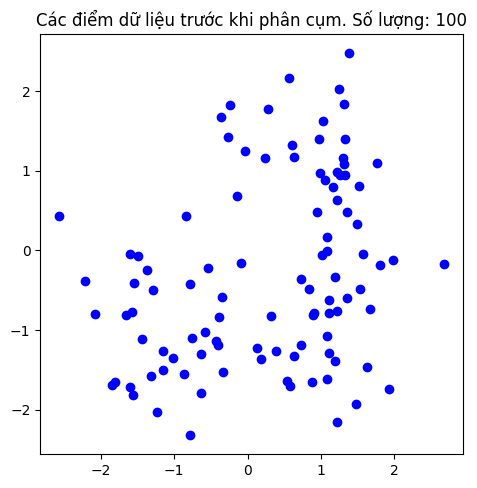

In [24]:
plt.figure(figsize=(12, 12))
plt.subplot(221)
plt.scatter(X[:, 0], X[:, 1], c='blue') # c là tham số chọn màu sắc, có thể truyền vào string hoặc số id 1,2,3 ...
plt.title("Các điểm dữ liệu trước khi phân cụm. Số lượng: {}".format(n_samples))
plt.show()

# Tự xây dựng giải thuật K-means:

Viết code cho giải thuật K-means tại mục này

In [25]:
def k_means(X, n_clusters):
    n_samples = X.shape[0]
    new_centroid = X[np.random.choice(n_samples, n_clusters, replace=False)]
    best_centroid = None
    label = np.empty(n_samples, dtype=int)

    while best_centroid is None or not np.allclose(new_centroid, best_centroid):
        best_centroid = new_centroid

        distance_to_centroid = euclidean_distances(X, best_centroid, squared=True)

        label = np.argmin(distance_to_centroid, axis=1)

        for k in range(n_clusters):
            Xk = X[label==k]
            if len(Xk) > 0:
                new_centroid[k] = np.mean(Xk, axis=0)

    return best_centroid, label

In [26]:
import matplotlib.pyplot as plt
import numpy as np

def k_means_display(X, centroid, label):
    k = len(centroid)
    plt.figure(figsize=(6, 5))
    plt.title('Sau khi dùng K-Means', fontsize=14)

    colors = plt.cm.get_cmap('rainbow', k)

    for i in range(k):
        plt.scatter(
            X[label == i, 0],
            X[label == i, 1],
            color=colors(i),      
            label=f'Cụm {i+1}',
            alpha=0.6,
            edgecolor='k'
        )

    plt.scatter(
        np.array(centroid)[:, 0],
        np.array(centroid)[:, 1],
        color='black',
        marker='o',
        s=200,
        label='Tâm cụm'
    )

    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.3)
    plt.show()


# Kiểm tra giải thuật K-means tự viết cho dữ liệu sinh ngẫu nhiên

- Áp dụng giải thuật K-means tự viết cho tập dữ liệu đã sinh ngẫu nhiên ở trên
- Quan sát kết quả và so sánh với giải thuật của sklearn

[[ 1.22089423 -0.35099901]
 [-0.87773046 -1.15851325]
 [ 0.41669601  1.39560043]]


/var/folders/bn/wpq8w0rs35g1r9gt5h2tpkcr0000gn/T/ipykernel_5280/4016348980.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('rainbow', k)


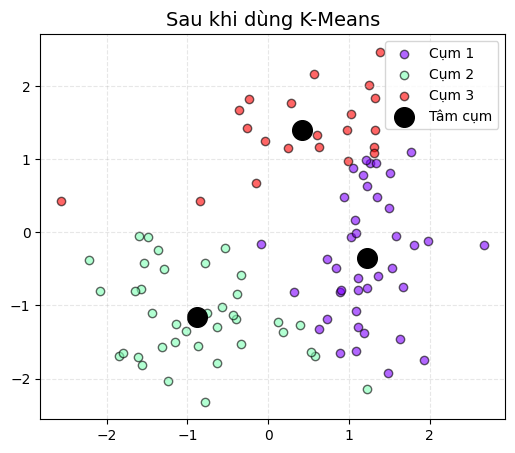

In [27]:
best_centroid, label = k_means(X, 3)
print(best_centroid)
k_means_display(X, best_centroid, label)

# Ứng dụng K-means tự viết vào nén ảnh 

## Thư viện sử dụng - hỗ trợ hình ảnh 

In [28]:
from skimage import io
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as image
from IPython.core.display import Image, display

/var/folders/bn/wpq8w0rs35g1r9gt5h2tpkcr0000gn/T/ipykernel_5280/2555458203.py:6: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import Image, display


## Đọc dữ liệu hình ảnh
- Mỗi điểm ảnh là 1 mẫu quan sát 
- Phân cụm tập dữ liệu (tập các điểm ảnh) về k nhãn

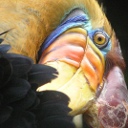

Số chiều của dữ liệu hình ảnh:  (16384, 3)
Tổng số điểm ảnh là:  16384
Mỗi điểm ảnh có số chiều =  3


In [29]:
path_img = 'bird_small.png'
display(Image(path_img, width=250, unconfined=True))
img = io.imread(path_img)
data_img = (img / 255.0).reshape(-1,img.shape[2]) # chuyển ma trận 128x128x3 về mảng 2 chiều 
img_shape = img.shape                    

print("Số chiều của dữ liệu hình ảnh: ", data_img.shape)
print("Tổng số điểm ảnh là: ", data_img.shape[0])
print("Mỗi điểm ảnh có số chiều = ", data_img.shape[1])

In [30]:
n_colors = 10
best_centroid, label = k_means(data_img, n_colors)

data_img = best_centroid[label]
data_img = np.reshape(data_img, img_shape)

image.imsave('img_kmean.png', data_img)

## Nén ảnh bằng giải thuật K-means tự viết

- Tạo file nén ảnh bằng giải thuật K-means tự viết
- Hiển thị kết quả của giải thuật tự viết và giải thuật của sklearn để so sánh


Ví dụ

Ảnh nén bằng K-means tự viết


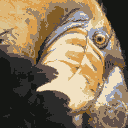

Ảnh nén bằng K-means của thư viện 


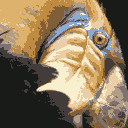

Ảnh gốc


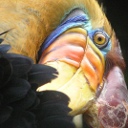

In [31]:
print('Ảnh nén bằng K-means tự viết')
display(Image('img_kmean.png', width=250, unconfined=True))#kết quả tự cài đặt
print('Ảnh nén bằng K-means của thư viện ')
display(Image('img128.png', width=250, unconfined=True)) #kết quả của thư viện
print('Ảnh gốc')
display(Image(path_img, width=250, unconfined=True))